Dataset taken from UN statistics on socioeconomic demographics, including (but not limited to) birth and mortality rates, age demographics, HIV prevalence, and population growth. 

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
sns.set()

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import missingno

df = pd.read_csv("UN_data.csv")
df.head(10)

,DEMO_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2016,2016,1.8,NaN,NaN
1,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2017,2017,1.7,NaN,NaN
2,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2018,2018,1.7,NaN,NaN
3,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2019,2019,1.7,NaN,NaN
4,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2020,2020,1.6,NaN,NaN
5,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUT,Austria,2016,2016,1.5,NaN,NaN
6,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUT,Austria,2017,2017,1.5,NaN,NaN
7,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUT,Austria,2018,2018,1.5,NaN,NaN
8,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUT,Austria,2019,2019,1.5,NaN,NaN
9,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUT,Austria,2020,2020,1.4,NaN,NaN


In [6]:
df.drop_duplicates(keep='first')

,DEMO_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2016,2016,1.8,NaN,NaN
1,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2017,2017,1.7,NaN,NaN
2,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2018,2018,1.7,NaN,NaN
3,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2019,2019,1.7,NaN,NaN
4,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2020,2020,1.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...
40914,PA_NUS_ATLS,DEC alternative conversion factor (LCU per US$),MAF,Saint-Martin (French part),2017,2017,0.9,NaN,NaN
40915,PA_NUS_ATLS,DEC alternative conversion factor (LCU per US$),MAF,Saint-Martin (French part),2018,2018,0.8,NaN,NaN
40916,PA_NUS_ATLS,DEC alternative conversion factor (LCU per US$),MAF,Saint-Martin (French part),2019,2019,0.9,NaN,NaN
40917,PA_NUS_ATLS,DEC alternative conversion factor (LCU per US$),MAF,Saint-Martin (French part),2020,2020,0.9,NaN,NaN


In [7]:
df.drop(['DEMO_IND', 'LOCATION', 'TIME'], axis=1, inplace=True)
df.head()

,Indicator,Country,Time,Value,Flag Codes,Flags
0,"Fertility rate, total (births per woman)",Australia,2016,1.8,NaN,NaN
1,"Fertility rate, total (births per woman)",Australia,2017,1.7,NaN,NaN
2,"Fertility rate, total (births per woman)",Australia,2018,1.7,NaN,NaN
3,"Fertility rate, total (births per woman)",Australia,2019,1.7,NaN,NaN
4,"Fertility rate, total (births per woman)",Australia,2020,1.6,NaN,NaN


In [8]:
missing_values_count = df.isnull().sum()
missing_values_count[:]

Indicator         0
Country           0
Time              0
Value           196
Flag Codes    40723
Flags         40723
dtype: int64

In [9]:
df.drop(['Flag Codes', 'Flags'], axis=1, inplace=True)
df

,Indicator,Country,Time,Value
0,"Fertility rate, total (births per woman)",Australia,2016,1.8
1,"Fertility rate, total (births per woman)",Australia,2017,1.7
2,"Fertility rate, total (births per woman)",Australia,2018,1.7
3,"Fertility rate, total (births per woman)",Australia,2019,1.7
4,"Fertility rate, total (births per woman)",Australia,2020,1.6
...,...,...,...,...
40914,DEC alternative conversion factor (LCU per US$),Saint-Martin (French part),2017,0.9
40915,DEC alternative conversion factor (LCU per US$),Saint-Martin (French part),2018,0.8
40916,DEC alternative conversion factor (LCU per US$),Saint-Martin (French part),2019,0.9
40917,DEC alternative conversion factor (LCU per US$),Saint-Martin (French part),2020,0.9


In [10]:
birthrates = df[(df["Indicator"] == "Fertility rate, total (births per woman)")]
birthrates

,Indicator,Country,Time,Value
0,"Fertility rate, total (births per woman)",Australia,2016,1.8
1,"Fertility rate, total (births per woman)",Australia,2017,1.7
2,"Fertility rate, total (births per woman)",Australia,2018,1.7
3,"Fertility rate, total (births per woman)",Australia,2019,1.7
4,"Fertility rate, total (births per woman)",Australia,2020,1.6
...,...,...,...,...
26723,"Fertility rate, total (births per woman)",Palestine,2016,3.8
26724,"Fertility rate, total (births per woman)",Palestine,2017,3.7
26725,"Fertility rate, total (births per woman)",Palestine,2018,3.6
26726,"Fertility rate, total (births per woman)",Palestine,2019,3.6


In [22]:
high_five = birthrates.sort_values('Value', ascending=False).head()
high_five


,Indicator,Country,Time,Value
650,"Fertility rate, total (births per woman)",Niger,2016,7.1
651,"Fertility rate, total (births per woman)",Niger,2017,7.0
652,"Fertility rate, total (births per woman)",Niger,2018,6.9
653,"Fertility rate, total (births per woman)",Niger,2019,6.8
654,"Fertility rate, total (births per woman)",Niger,2020,6.7


Niger had a higher birth rate than any country for all years 2016 - 2020.

In [23]:
high_twenty = birthrates.sort_values('Value', ascending=False).head(20)
high_twenty

,Indicator,Country,Time,Value
650,"Fertility rate, total (births per woman)",Niger,2016,7.1
651,"Fertility rate, total (births per woman)",Niger,2017,7.0
652,"Fertility rate, total (births per woman)",Niger,2018,6.9
653,"Fertility rate, total (births per woman)",Niger,2019,6.8
654,"Fertility rate, total (births per woman)",Niger,2020,6.7
18340,"Fertility rate, total (births per woman)",Somalia,2016,6.3
18341,"Fertility rate, total (births per woman)",Somalia,2017,6.2
325,"Fertility rate, total (births per woman)",Democratic Republic of the Congo,2016,6.1
580,"Fertility rate, total (births per woman)",Mali,2016,6.1
18342,"Fertility rate, total (births per woman)",Somalia,2018,6.1


Top 20 results to get more data on other countries.

In [28]:
low_five = birthrates.sort_values('Value', ascending=True).head()
low_five


,Indicator,Country,Time,Value
79,"Fertility rate, total (births per woman)",Republic of Korea,2020,0.8
454,"Fertility rate, total (births per woman)","China, Hong Kong Special Administrative Region",2020,0.9
78,"Fertility rate, total (births per woman)",Republic of Korea,2019,0.9
694,"Fertility rate, total (births per woman)",Puerto Rico,2020,0.9
77,"Fertility rate, total (births per woman)",Republic of Korea,2018,1.0


The lowest birth rates are spread across more countries as evidenced by the fact there are multiple countries in these results, whereas all the highest birth rates for all years measured were in Niger. 

In [29]:
low_twenty = birthrates.sort_values('Value', ascending=True).head(20)
low_twenty

,Indicator,Country,Time,Value
79,"Fertility rate, total (births per woman)",Republic of Korea,2020,0.8
454,"Fertility rate, total (births per woman)","China, Hong Kong Special Administrative Region",2020,0.9
78,"Fertility rate, total (births per woman)",Republic of Korea,2019,0.9
694,"Fertility rate, total (births per woman)",Puerto Rico,2020,0.9
77,"Fertility rate, total (births per woman)",Republic of Korea,2018,1.0
693,"Fertility rate, total (births per woman)",Puerto Rico,2019,1.0
692,"Fertility rate, total (births per woman)",Puerto Rico,2018,1.0
588,"Fertility rate, total (births per woman)",Malta,2019,1.1
589,"Fertility rate, total (births per woman)",Malta,2020,1.1
732,"Fertility rate, total (births per woman)",Singapore,2018,1.1


Top 20 lowest birth rate results to compare with highest. 

In [25]:
data = high_twenty['Country'].value_counts()
data

Niger                               5
Somalia                             5
Democratic Republic of the Congo    4
Mali                                4
Chad                                2
Name: Country, dtype: int64

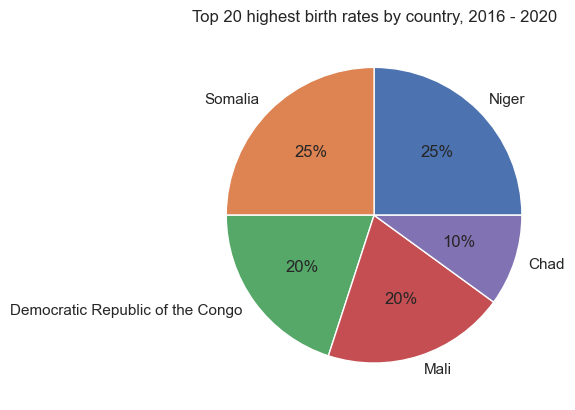

In [27]:
plt.pie(data, labels=data.index, autopct='%1.0f%%')
plt.title("Top 20 highest birth rates by country, 2016 - 2020")
plt.show()

In [30]:
data_low = low_twenty['Country'].value_counts()
data_low

Puerto Rico                                       5
Republic of Korea                                 4
China, Hong Kong Special Administrative Region    4
Singapore                                         3
Malta                                             2
China, Macao Special Administrative Region        2
Name: Country, dtype: int64

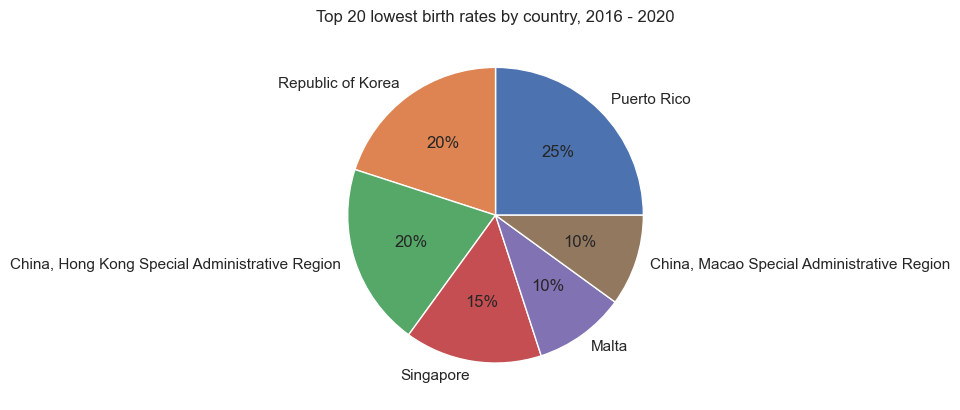

In [31]:
plt.pie(data_low, labels=data_low.index, autopct='%1.0f%%')
plt.title("Top 20 lowest birth rates by country, 2016 - 2020")
plt.show()

Five countries make up the top 20 highest birth rates, but 6 are on the lowest 20 birth rates. All of the highest birth rate countries are in Africa, whereas 4 out of 6 lowest birth rate countries are in East Asia. The remaining two are in North America and Europe.

In [34]:
anglo_birthrates = birthrates[(birthrates["Country"] == "United Kingdom of Great Britain and Northern Ireland") | (birthrates["Country"] == "Australia") | (birthrates["Country"] == "New Zealand") | (birthrates["Country"] == "United Kingdom") | (birthrates["Country"] == "Canada") | (birthrates["Country"] == "Ireland") | (birthrates["Country"] == "United States of America") | (birthrates["Country"] == "South Africa")]
anglo_birthrates

,Indicator,Country,Time,Value
0,"Fertility rate, total (births per woman)",Australia,2016,1.8
1,"Fertility rate, total (births per woman)",Australia,2017,1.7
2,"Fertility rate, total (births per woman)",Australia,2018,1.7
3,"Fertility rate, total (births per woman)",Australia,2019,1.7
4,"Fertility rate, total (births per woman)",Australia,2020,1.6
15,"Fertility rate, total (births per woman)",Canada,2016,1.6
16,"Fertility rate, total (births per woman)",Canada,2017,1.5
17,"Fertility rate, total (births per woman)",Canada,2018,1.5
18,"Fertility rate, total (births per woman)",Canada,2019,1.5
19,"Fertility rate, total (births per woman)",Canada,2020,1.4


Birth rates of Kachru's Inner Circle.

In [39]:
twenty_birthrates = anglo_birthrates[(anglo_birthrates["Time"] == 2020)]
twenty_birthrates


,Indicator,Country,Time,Value
4,"Fertility rate, total (births per woman)",Australia,2020,1.6
19,"Fertility rate, total (births per woman)",Canada,2020,1.4
64,"Fertility rate, total (births per woman)",Ireland,2020,1.6
99,"Fertility rate, total (births per woman)",New Zealand,2020,1.6
18010,"Fertility rate, total (births per woman)",United States of America,2020,1.6
21185,"Fertility rate, total (births per woman)",United Kingdom of Great Britain and Northern I...,2020,1.6
22936,"Fertility rate, total (births per woman)",South Africa,2020,2.4


In [64]:
twenty_birthrates['Country'] = twenty_birthrates['Country'].replace(['United Kingdom of Great Britain and Northern Ireland'], "UK")
twenty_birthrates['Country'] = twenty_birthrates['Country'].replace(['United States of America'], "USA")
twenty_birthrates



/var/folders/qn/vm0csw1j0qj715_s2q7ty0f40000gn/T/ipykernel_7963/4161776500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_birthrates['Country'] = twenty_birthrates['Country'].replace(['United Kingdom of Great Britain and Northern Ireland'], "UK")
/var/folders/qn/vm0csw1j0qj715_s2q7ty0f40000gn/T/ipykernel_7963/4161776500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_birthrates['Country'] = twenty_birthrates['Country'].replace(['United States of America'], "USA")


,Indicator,Country,Time,Value
4,"Fertility rate, total (births per woman)",Australia,2020,1.6
19,"Fertility rate, total (births per woman)",Canada,2020,1.4
64,"Fertility rate, total (births per woman)",Ireland,2020,1.6
99,"Fertility rate, total (births per woman)",New Zealand,2020,1.6
18010,"Fertility rate, total (births per woman)",USA,2020,1.6
21185,"Fertility rate, total (births per woman)",UK,2020,1.6
22936,"Fertility rate, total (births per woman)",South Africa,2020,2.4


Birth rates of Kachru's Inner Circle in 2020.

<Figure size 1000x500 with 0 Axes>

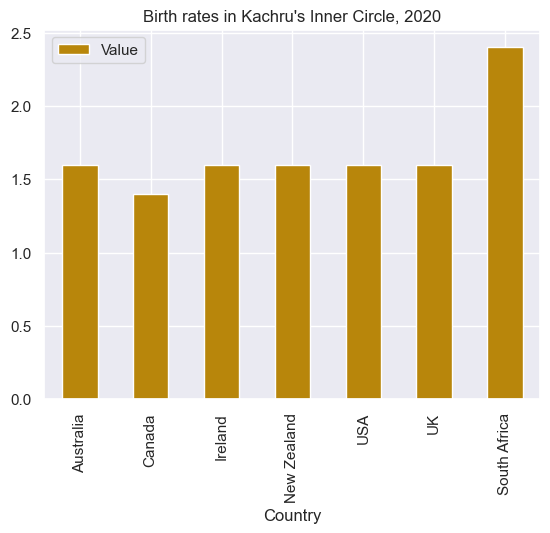

In [66]:
plt.figure(figsize=(10,5)) 
twenty_birthrates.plot.bar(x="Country", y="Value", 
                           title="Birth rates in Kachru's Inner Circle, 2020", 
                           color='darkgoldenrod')
plt.xticks(rotation=90)
plt.show()

Of the countries in Kachru's Inner Circle of World Englishes, South Africa has the highest birth rate, which is consistent with the highest birth rates overall being found in Africa. 

TO DO VISUALISATIONS/ANALYSIS

Birth rates per GDP 
Infant mortality rates per GDP 

Pseudo:
create a temp df with GDP, fertility, mortality rates to feed into visualisation code

In [70]:
GDP = df[(df["Indicator"] == "GDP (current US$)")]
GDP

,Indicator,Country,Time,Value
5950,GDP (current US$),Australia,2016,1.206685e+12
5951,GDP (current US$),Australia,2017,1.326883e+12
5952,GDP (current US$),Australia,2018,1.428530e+12
5953,GDP (current US$),Australia,2019,1.391953e+12
5954,GDP (current US$),Australia,2020,1.327836e+12
...,...,...,...,...
40376,GDP (current US$),Turks and Caicos Islands,2020,9.245830e+08
40377,GDP (current US$),Turks and Caicos Islands,2021,9.432698e+08
40810,GDP (current US$),Sint Maarten (Dutch part),2016,1.263687e+09
40811,GDP (current US$),Sint Maarten (Dutch part),2017,1.191620e+09


In [71]:
GDP_high = GDP.sort_values('Value', ascending=False).head()
GDP_high

,Indicator,Country,Time,Value
22518,GDP (current US$),United States of America,2021,2.299610e+13
22516,GDP (current US$),United States of America,2019,2.137257e+13
22517,GDP (current US$),United States of America,2020,2.089374e+13
22515,GDP (current US$),United States of America,2018,2.052716e+13
22514,GDP (current US$),United States of America,2017,1.947962e+13
